In [1]:
# CLUSTERING ASSIGNMENT

In [2]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the csv file
# Finding shape of the file 
df= pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df.shape

(3999, 12)

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Data Preprocessing:

In [6]:
# Statistical Summary:
# ID#	           NUMBER		Telcom	Unique ID
# Balance	       NUMBER	8	Raw	Number of miles eligible for award travel
# Qual_miles	   NUMBER	8	Raw	Number of miles counted as qualifying for Topflight status
# cc1_miles	       CHAR	1	    Raw	Number of miles earned with freq. flyer credit card in the past 12 months:
# cc2_miles	       CHAR	1	    Raw	Number of miles earned with Rewards credit card in the past 12 months:
# cc3_miles	       CHAR	1	    Raw	Number of miles earned with Small Business credit card in the past 12 months:
#                                        note:  miles bins :1 = under 5,000
# 				                                            2 = 5,000 - 10,000
# 				                                            3 = 10,001 - 25,000
# 				                                            4 = 25,001 - 50,000
# 				                                            5 = over 50,000
# Bonus_miles	    NUMBER		Raw	Number of miles earned from non-flight bonus transactions in the past 12 months
# Bonus_trans	    NUMBER		Raw	Number of non-flight bonus transactions in the past 12 months
# Flight_miles_12mo	NUMBER		Raw	Number of flight miles in the past 12 months
# Flight_trans_12	NUMBER		Raw	Number of flight transactions in the past 12 months
# Days_since_enroll	NUMBER		Telcom	Number of days since Enroll_date
# Award?	        NUMBER		Telcom	Dummy variable for Last_award (1=not null, 0=null)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [7]:
# No missing values
# All data is of the same Dtype
# No need of further cleaning
# We just need to plot for finding outliers and removing them if necessary
df=df.drop('ID#',axis='columns')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


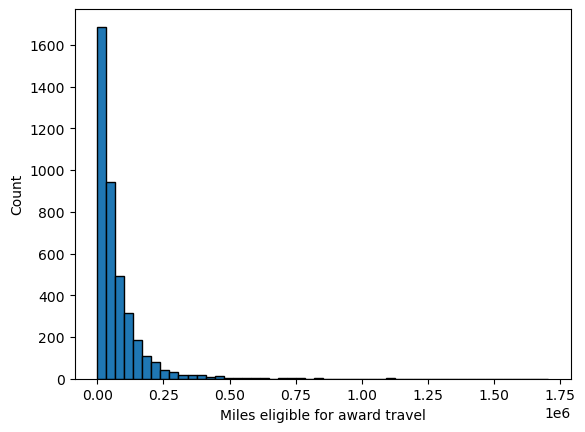

In [9]:
# This histplot follows a positively skewed distribution
# We can also say that passengers with 0 miles are also eligible for award travel
plt.hist(df['Balance'],edgecolor='black',bins=50)
plt.xlabel('Miles eligible for award travel')
plt.ylabel('Count')
plt.show()

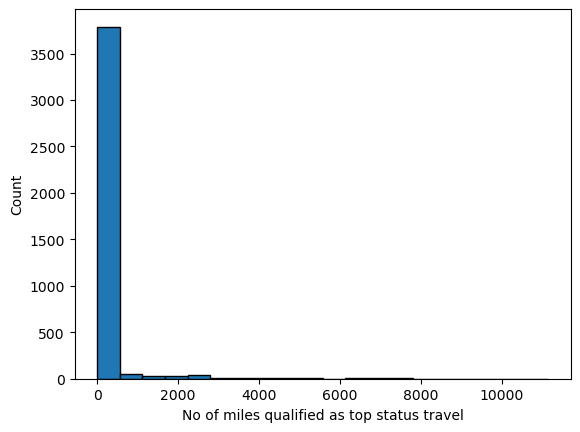

In [10]:
# This histplot follows a positively skewed distribution
plt.hist(df['Qual_miles'],edgecolor='black',bins=20)
plt.xlabel('No of miles qualified as top status travel')
plt.ylabel('Count')
plt.show()

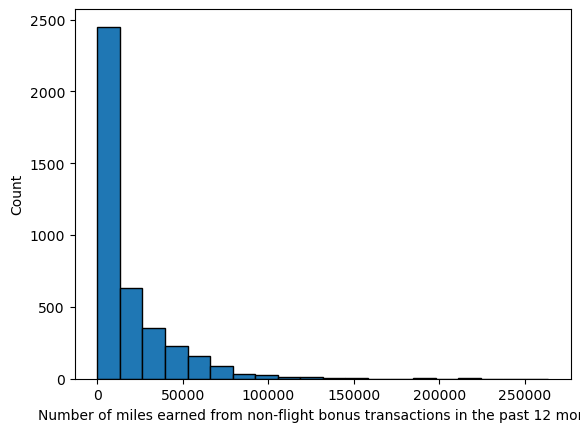

In [11]:
plt.hist(df['Bonus_miles'],edgecolor='black',bins=20)
plt.xlabel('Number of miles earned from non-flight bonus transactions in the past 12 months')
plt.ylabel('Count')
plt.show()

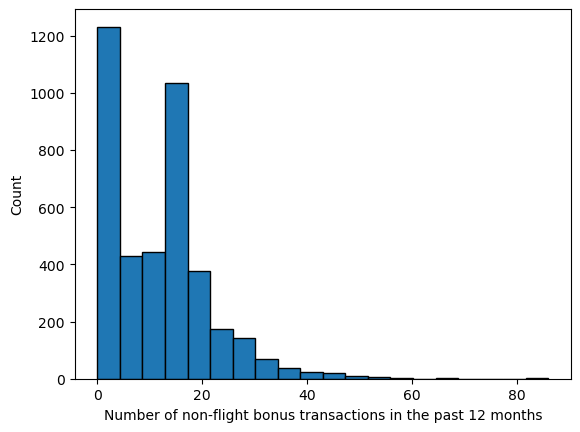

In [12]:
plt.hist(df['Bonus_trans'],edgecolor='black',bins=20)
plt.xlabel('Number of non-flight bonus transactions in the past 12 months')
plt.ylabel('Count')
plt.show()

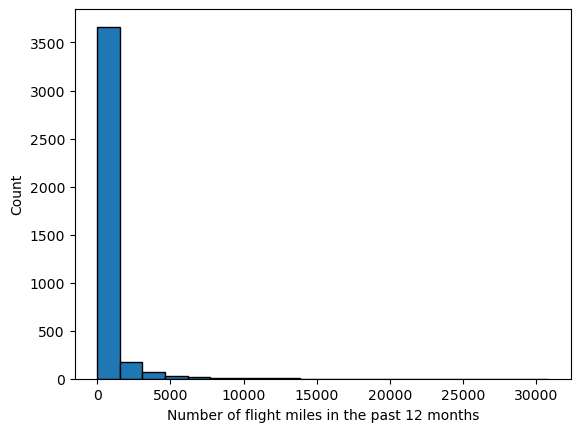

In [13]:
plt.hist(df['Flight_miles_12mo'],edgecolor='black',bins=20)
plt.xlabel('Number of flight miles in the past 12 months')
plt.ylabel('Count')
plt.show()

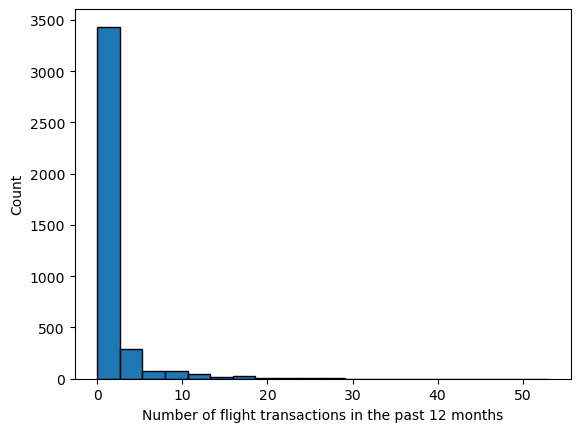

In [14]:
plt.hist(df['Flight_trans_12'],edgecolor='black',bins=20)
plt.xlabel('Number of flight transactions in the past 12 months')
plt.ylabel('Count')
plt.show()

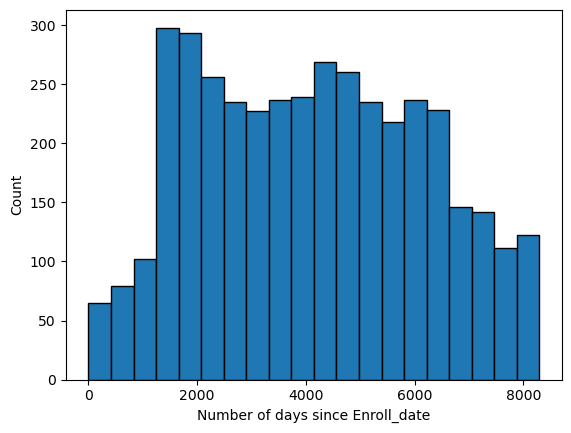

In [15]:
plt.hist(df['Days_since_enroll'],edgecolor='black',bins=20)
plt.xlabel('Number of days since Enroll_date')
plt.ylabel('Count')
plt.show()

In [17]:
# Distributions for Categorical 

<Axes: >

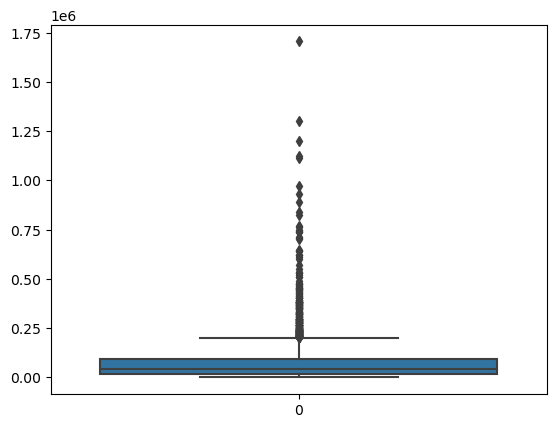

In [18]:
# To find outliers
sns.boxplot(df['Balance'])

<Axes: >

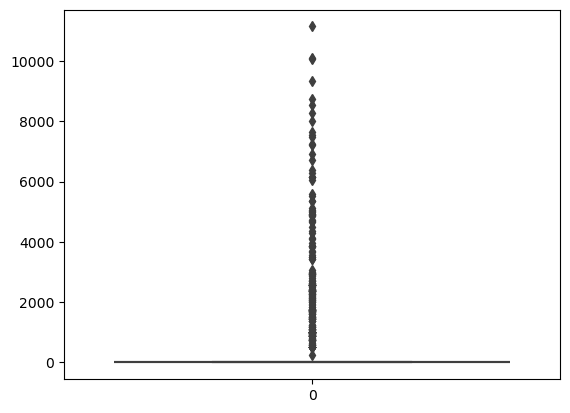

In [19]:
# There are so many outliers because most of the population have 0 as the value 
# these could be data entry or might have some meaning
sns.boxplot(df['Qual_miles'])

<Axes: >

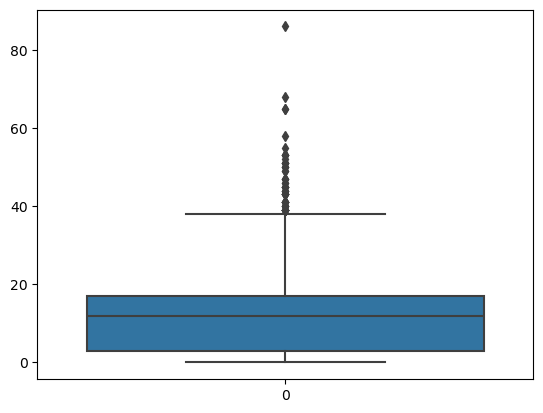

In [20]:
sns.boxplot(df['Bonus_trans'])

<Axes: >

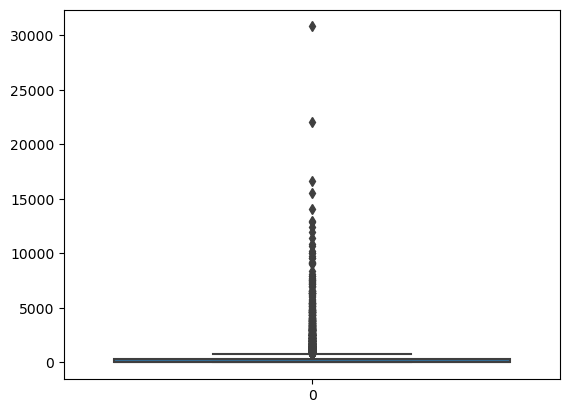

In [21]:
sns.boxplot(df['Flight_miles_12mo'])

<Axes: >

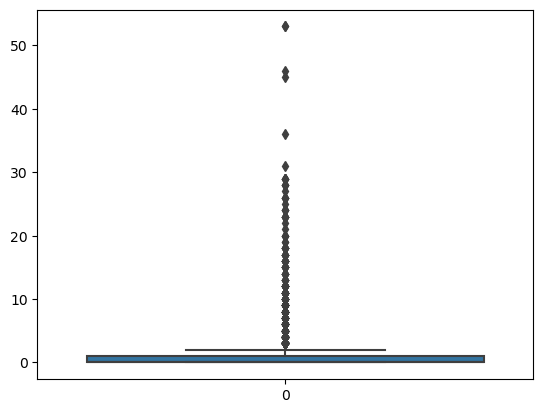

In [22]:
sns.boxplot(df['Flight_trans_12'])

In [23]:
# let's remove outliers in 3 variables as in other variables its possible
out_list=["Bonus_trans","Flight_miles_12mo","Flight_trans_12"]

# remove outliers;

for i in df.loc[:,out_list]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

C:\Users\subha\AppData\Local\Temp\ipykernel_21440\3352008812.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '777.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > up_lim,i] = up_lim
C:\Users\subha\AppData\Local\Temp\ipykernel_21440\3352008812.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i] > up_lim,i] = up_lim


<Axes: >

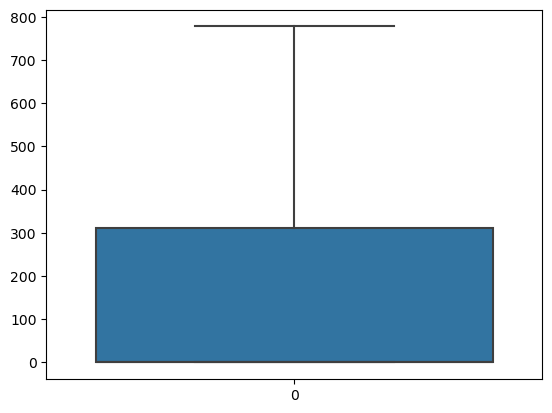

In [24]:
# we can see that the outliers has been removed
sns.boxplot(df['Flight_miles_12mo'])

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.470618,9.115104,0.0,3.0,12.0,17.0,38.0
Flight_miles_12mo,3999.0,178.055639,294.678028,0.0,0.0,0.0,311.0,777.5
Flight_trans_12,3999.0,0.591523,0.944826,0.0,0.0,0.0,1.0,2.5
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [26]:
#Categorical Analysis:
cat_list=['cc1_miles', 'cc2_miles', 'cc3_miles', 'Award?']

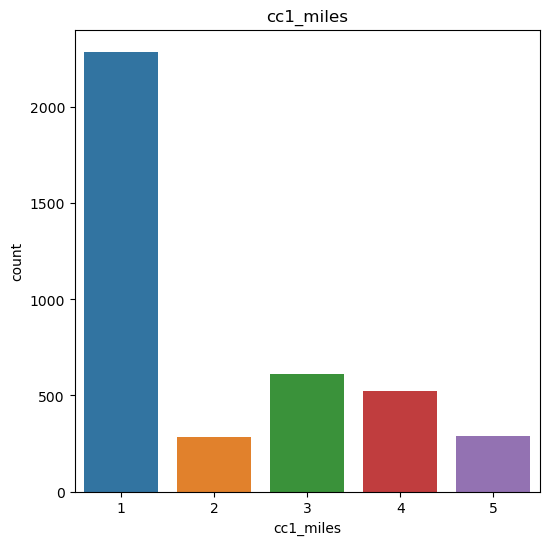

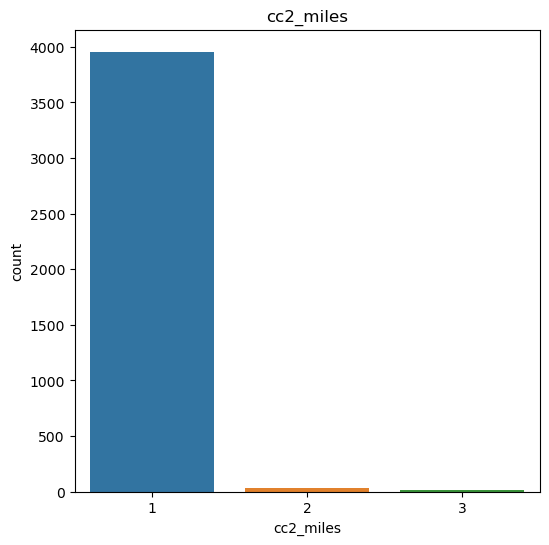

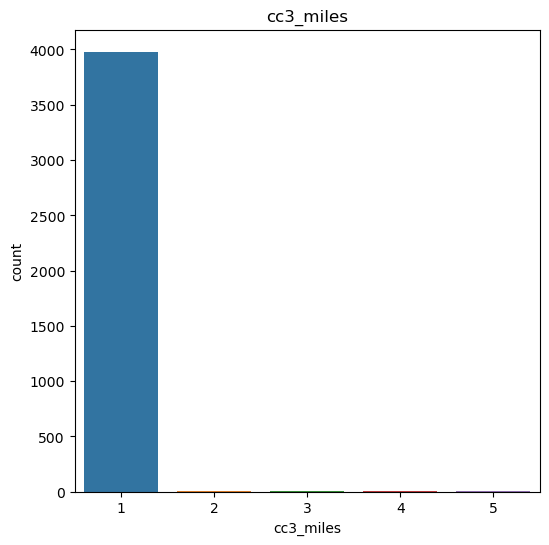

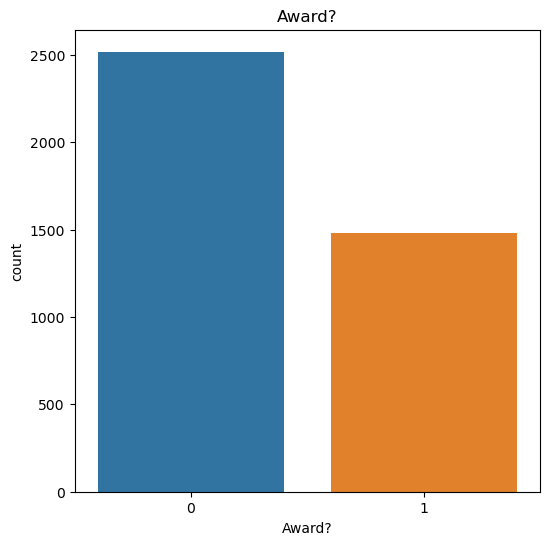

In [27]:

for i in cat_list:
    plt.figure(figsize=(6,6))
    sns.countplot(x = i, data =df.loc[:,cat_list])
    plt.title(i)

In [33]:
df['Award?'].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [34]:
df.cc1_miles.value_counts()

cc1_miles
1    2289
3     613
4     525
5     288
2     284
Name: count, dtype: int64

In [35]:
df.cc2_miles.value_counts()

cc2_miles
1    3956
2      28
3      15
Name: count, dtype: int64

In [36]:
df.cc3_miles.value_counts()

cc3_miles
1    3981
4       6
5       5
3       4
2       3
Name: count, dtype: int64

In [ ]:
# Correlation Analysis:

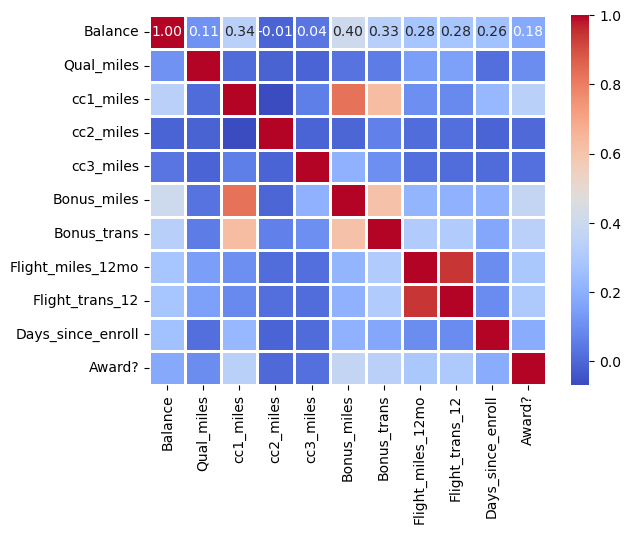

In [37]:
# there is a very high correlation between the two variables flightmiles12mo and flighttrans12 columns
sns.heatmap(df.corr(),annot=True,linewidths=0.8,fmt=".2f",cmap="coolwarm")
plt.show()

In [38]:
# K-Means Clustering:

In [39]:
# First we find the k-value using k-elbow visualization:
from sklearn.cluster import KMeans

In [40]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   --------------------- ------------------ 153.6/282.6 kB 1.3 MB/s eta 0:00:01
   --------------------------------- ------ 235.5/282.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00


In [41]:
from yellowbrick.cluster import KElbowVisualizer

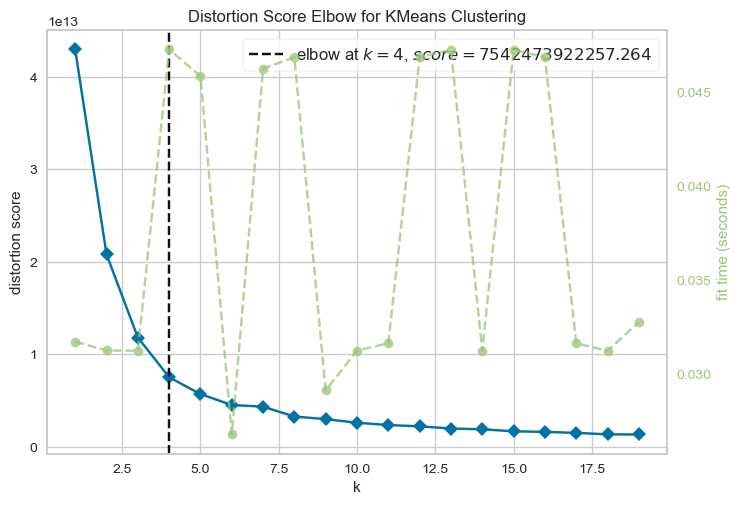

In [43]:
# for K-elbow;
# We have K = 4
kmeans=KMeans(n_init='auto')
visualizer=KElbowVisualizer(kmeans,k=(1,20))
visualizer.fit(df)
visualizer.poof()
plt.show()

In [45]:
# Applying the algorithm:
km=KMeans(n_clusters=4,init="k-means++").fit(df)
km

D:\Coding\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [46]:
df['ClusterNo']=km.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterNo
0,28143,0,1,1,1,174,1,0.0,0.0,7000,0,2
1,19244,0,1,1,1,215,2,0.0,0.0,6968,0,2
2,41354,0,1,1,1,4123,4,0.0,0.0,7034,0,2
3,14776,0,1,1,1,500,1,0.0,0.0,6952,0,2
4,97752,0,4,1,1,43300,26,777.5,2.5,6935,1,0


In [51]:
# for visualizing:
df.ClusterNo.value_counts()

ClusterNo
2    2800
0     988
3     185
1      26
Name: count, dtype: int64

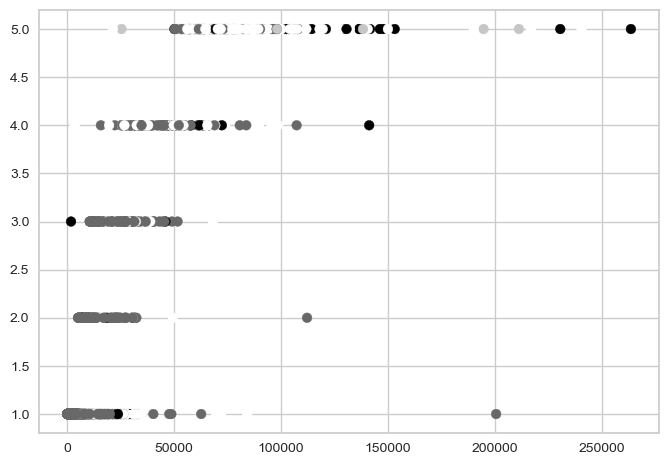

In [54]:
plt.scatter(x=df['Bonus_miles'], y=df['cc1_miles'], c=df['ClusterNo'] )

plt. show()

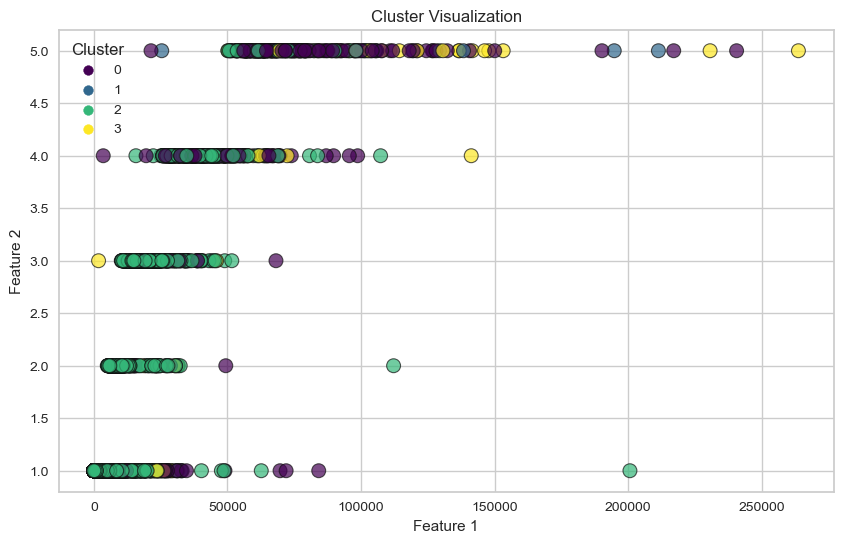

In [55]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bonus_miles', y='cc1_miles', hue='ClusterNo', palette='viridis', data=df, s=100, alpha=0.7, edgecolor='k')

# Add plot title and labels
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show plot
plt.legend(title='Cluster')
plt.show()

In [69]:
# We Try to scale few features:
# And then apply clustering 
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df1=df.copy()
sc.fit(df1[['Bonus_miles']])
df1[['Bonus_miles']]=sc.transform(df1[['Bonus_miles']])
df1.Bonus_miles.head()

0    0.000660
1    0.000815
2    0.015636
3    0.001896
4    0.164211
Name: Bonus_miles, dtype: float64

In [70]:
sc.fit(df1[['Days_since_enroll']])
df1[['Days_since_enroll']]=sc.transform(df1[['Days_since_enroll']])
df1.Days_since_enroll.head()

0    0.843742
1    0.839884
2    0.847842
3    0.837955
4    0.835905
Name: Days_since_enroll, dtype: float64

In [71]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df1[['Bonus_miles', 'Days_since_enroll']])
y_predicted

D:\Coding\DS\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 1, 1, 1])

In [72]:
y_predicted =df1['ClusterNo']

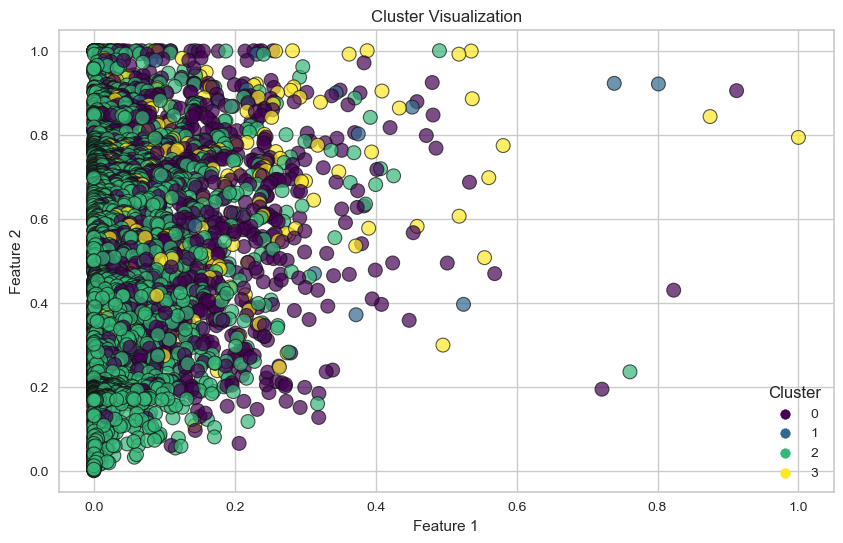

In [73]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bonus_miles', y='Days_since_enroll', hue='ClusterNo', palette='viridis', data=df1, s=100, alpha=0.7, edgecolor='k')

# Add plot title and labels
plt.title('Cluster Visualization')
plt.xlabel('Bonus_miles')
plt.ylabel('Days_since_enroll')

# Show plot
plt.legend(title='Cluster')
plt.show()

In [74]:
# Calculating silhoutte score:
# higher value indicates that the clusters are well-separated from each other and cohesive within.
from sklearn.metrics import silhouette_score

In [75]:
# For unscaled datafram df:
# Calculate silhouette score
features = df.drop(columns=['ClusterNo'])
cluster_labels = df['ClusterNo']
sil_score = silhouette_score(features, cluster_labels)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5904507000183932


In [76]:
# For scaled datafram df:
# Calculate silhouette score
features = df1.drop(columns=['ClusterNo'])
cluster_labels = df1['ClusterNo']
sil_score = silhouette_score(features, cluster_labels)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.6496632099385594


In [58]:
#Hierarchical Clustering:

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram

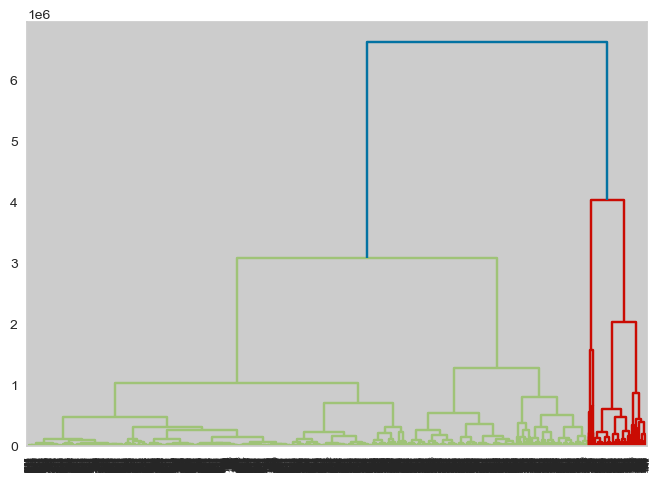

In [57]:
#3 or 4 sets look ideal.
dendogram=sch.dendrogram(sch.linkage(df,method="ward"))
plt.show()

In [77]:
# DBSCAN algo:

In [78]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [79]:
# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [80]:
# Apply DBSCAN clustering
# eps: maximum distance between two samples for them to be considered as in the same neighborhood
# min_samples: number of samples in a neighborhood for a point to be considered a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['ClusterNo'] = dbscan.fit_predict(df_scaled)

In [82]:
# Display the first few rows to verify the clusters
# -1 indicated nothing but noise
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,ClusterNo
0,28143,0,1,1,1,174,1,0.0,0.0,7000,0,0
1,19244,0,1,1,1,215,2,0.0,0.0,6968,0,0
2,41354,0,1,1,1,4123,4,0.0,0.0,7034,0,0
3,14776,0,1,1,1,500,1,0.0,0.0,6952,0,0
4,97752,0,4,1,1,43300,26,777.5,2.5,6935,1,-1


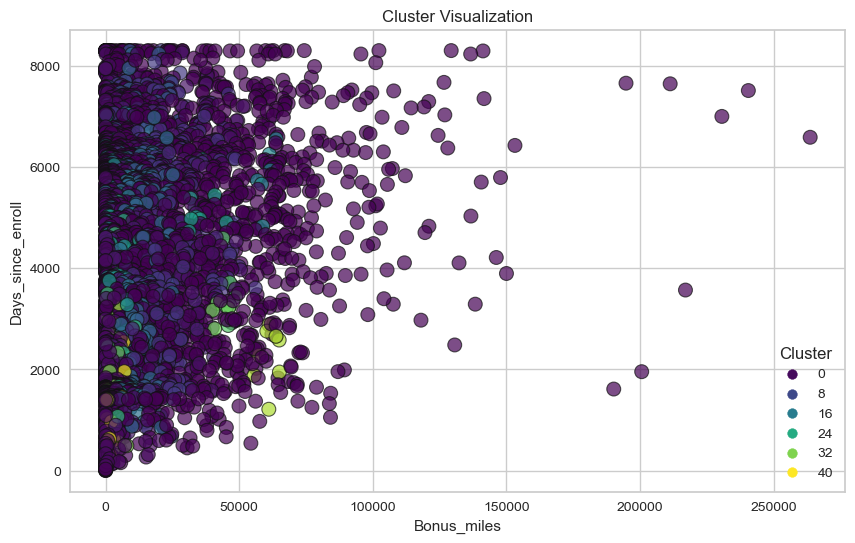

In [83]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bonus_miles', y='Days_since_enroll', hue='ClusterNo', palette='viridis', data=df, s=100, alpha=0.7, edgecolor='k')

# Add plot title and labels
plt.title('Cluster Visualization')
plt.xlabel('Bonus_miles')
plt.ylabel('Days_since_enroll')

# Show plot
plt.legend(title='Cluster')
plt.show()

In [84]:
# For scaled datafram df:
# Calculate silhouette score
features = df.drop(columns=['ClusterNo'])
cluster_labels = df['ClusterNo']
sil_score = silhouette_score(features, cluster_labels)

print(f'Silhouette Score: {sil_score}')

Silhouette Score: -0.5315745639894484


In [ ]:
#Conclusion
# We performed clustering using the EastWestAirlines dataset. Our aim is to try to identify passenger clusters with similar characteristics in order to 
# target different segments for different distance offers. After various operations, we divided them into 4 different clusters. 
# Our dataset consists of 3999 observations and 12 attributes.